+ Name : Vanshita Mahajan
+ Roll Number : 2021101102 

#### Hypothesis Testing Homework

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
import numpy as np
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy import stats

In [55]:
df = pd.read_excel("Hypothesis testing data.xlsx")
df

,Unnamed: 0,GPA,IQ,GENDER,TESTSCORE,Unnamed: 5,Unnamed: 6,Unnamed: 7,Exerice_Times,Exercise code,Anxiety
0,1,7.940,111,2,67,NaN,NaN,NaN,0.0,0.0,21.0
1,2,8.292,107,2,43,NaN,NaN,NaN,0.0,0.0,11.0
2,3,4.643,100,2,52,NaN,NaN,NaN,0.0,0.0,12.0
3,4,7.470,107,2,66,NaN,NaN,NaN,0.0,0.0,28.0
4,5,8.882,114,1,58,NaN,NaN,NaN,0.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...
73,85,9.000,112,1,60,NaN,NaN,NaN,NaN,NaN,NaN
74,86,9.500,112,1,70,NaN,NaN,NaN,NaN,NaN,NaN
75,87,6.057,114,2,51,NaN,NaN,NaN,NaN,NaN,NaN
76,88,6.057,93,1,21,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# Display the results
testscores_gpa_below_7 = df[df['GPA'] <= 7]['TESTSCORE']
testscores_gpa_above_7 = df[df['GPA'] > 7]['TESTSCORE']

# Display the results without index
print("TESTSCORE for GPA <= 7:")
print(testscores_gpa_below_7.to_string(index=False))

print("\nTESTSCORE for GPA > 7:")
print(testscores_gpa_above_7.to_string(index=False))

TESTSCORE for GPA <= 7:
52
51
49
54
56
40
66
20
56
52
46
66
53
67
30
44
36
42
28
51
21
56

TESTSCORE for GPA > 7:
67
43
66
58
51
71
51
35
54
64
69
55
65
55
68
69
70
80
53
65
67
62
39
71
59
60
64
71
72
54
64
58
70
72
70
47
67
63
61
54
60
60
63
54
66
44
49
67
64
73
59
37
63
64
60
70


In [57]:
# Shapiro-Wilk test for normality - GPA <= 7

stat_0, p_value_0 = shapiro(testscores_gpa_below_7)
alpha = 0.05 # arbitrary

if p_value_0 > alpha:
    print("The test score for GPA below 7 follows a normal distribution")
else:
    print("The test score for GPA below 7 does not follow a normal distribution")


# Shapiro-Wilk test for normality - GPA > 7
    
stat_1, p_value_1 = shapiro(testscores_gpa_above_7)

if p_value_1 > alpha:
    print("The test score for GPA above 7 follows a normal distribution")
else:
    print("The test score for GPA above 7 does not follow a normal distribution")

print("")
print("stat_0:", stat_0, "stat_1:", stat_1)
print("p_value_0:", p_value_0, "p_value_1:", p_value_1)

The test score for GPA below 7 follows a normal distribution
The test score for GPA above 7 does not follow a normal distribution

stat_0: 0.9349780678749084 stat_1: 0.9424629807472229
p_value_0: 0.15576288104057312 p_value_1: 0.009911353699862957


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


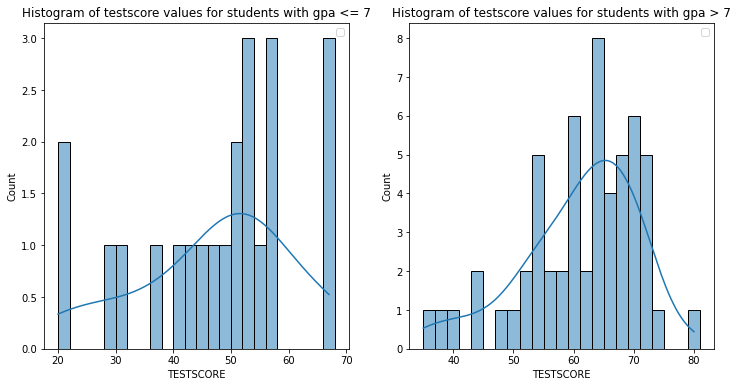

In [58]:
# Visualize the data
plt.figure(figsize=(12, 6))

# Plot histograms
plt.subplot(1, 2, 1)
sns.histplot(testscores_gpa_below_7, kde=True, binwidth = 2)
plt.title('Histogram of testscore values for students with gpa <= 7')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(testscores_gpa_above_7, kde=True, binwidth = 2)
plt.title('Histogram of testscore values for students with gpa > 7')
plt.legend()

plt.show()

### T- Test

In [59]:
# Perform independent two-sample t-test
t_stat, p_value_ttest = ttest_ind(testscores_gpa_above_7, testscores_gpa_below_7)

# Set the significance level
alpha_ttest = 0.05

# Check for significance
if p_value_ttest < alpha_ttest:
    print("The difference in testscores between students with gpa <= 7 and those with gpa > 7 is statistically significant (reject H0)")
else:
    print("There is no significant difference in testscores between students with gpa <= 7 and those with gpa > 7  (fail to reject H0)")

# Display t-statistic and p-value
print(f"t-statistic: {t_stat}")
print(f"P-value: {p_value_ttest}")

The difference in testscores between students with gpa <= 7 and those with gpa > 7 is statistically significant (reject H0)
t-statistic: 5.0556158403339255
P-value: 2.884171214210811e-06


### Effect Size

In [60]:
mean_0 = np.mean(testscores_gpa_below_7)
mean_1 = np.mean(testscores_gpa_above_7)
var_0 = np.var(testscores_gpa_below_7)
var_1 = np.var(testscores_gpa_above_7)

# Calculate pooled standard deviation
pooled_std = np.sqrt(((len(testscores_gpa_below_7) - 1) * var_0 + (len(testscores_gpa_above_7) - 1) * var_1) / (len(testscores_gpa_below_7) + len(testscores_gpa_above_7) - 2))

# Calculate Cohen's d
cohen_d = (mean_0 - mean_1) / pooled_std
cohen_d = abs(cohen_d)

print(f"Cohen's d: {cohen_d}")

Cohen's d: 1.2913781992067632


In [61]:
print("Mean test score for gpa <= 7 is", mean_0)
print("Mean test score for gpa > 7 is", mean_1)

Mean test score for gpa <= 7 is 47.09090909090909
Mean test score for gpa > 7 is 60.839285714285715


A brief description of the tests performed and what can be interpreted of them:

Shapiro-Wilk Test:

+ Purpose: The Shapiro-Wilk test is used to assess whether a given sample comes from a normally distributed population.
+ Null Hypothesis (H0): The data follows a normal distribution.
+ Interpretation: If the p-value from the test is greater than the significance level (commonly set at 0.05), we fail to reject the null hypothesis, indicating that there's no significant evidence to suggest a departure from normality.

Independent t-test (ttest_ind):

+ Purpose: The independent t-test is used to determine whether there is a significant difference between the means of two independent groups.
+ Null Hypothesis (H0): There is no significant difference between the group means.
+ Interpretation: If the p-value is less than the significance level (commonly set at 0.05), we reject the null hypothesis, suggesting that there is a significant difference between the means of the two groups. The t-statistic indicates the size and direction of this difference.

Cohen's d:

+ Purpose: Cohen's d is a measure of effect size that quantifies the difference between two groups in terms of standard deviations.
+ Interpretation: A larger Cohen's d value indicates a larger effect size. Commonly, a d value of 0.2 is considered small, 0.5 is moderate, and 0.8 or higher is large. It provides information about the practical significance of the observed difference, irrespective of sample size.


### Report

##### **Null Hypothesis (H0)**: Doing exercise has no significant difference in anxitey levels. In other words, the mean testscore is same issrespective of student GPA.
##### **Alternate Hypothesis (H1):** There is a significant difference in testscore performance based on the student GPA. That is, students with GPA > 7 perform significantly different compared to those with GPA <= 7.

### testscores_gpa_below_7:
+ Shapiro-Wilk Statistic: stat_0 
+ P-Value: p_value_0 

### testscores_gpa_above_7:
+ Shapiro-Wilk Statistic: stat_1 
+ P-Value: p_value_1 

### *Following Observations can be made* :

#### 1. **Shapiro-Wilk Test for Normality:** Upon performing the Shapiro-Wilk test, the p_value for testscores for students with gpa <= 7 is 0.155 which is greater than alpha, indicating that data follows a normal distribution. The p-value for testscores for students with gpa > 7  is 0.009 which is less than 0.05, hence data does not follow a normal distribution in this case.

#### 2. **Independent Tests:** The t-statistic (t_stat) is a measure of how many standard deviations a particular data point (or the sample mean) is from the mean of the distribution (or the population mean) in standard deviation units. In the context of a t-test, it helps assess whether the means of two groups are significantly different from each other. The t-test for above data resulted in a t-statistic of 5.05 with a p-value of 2.88 * 10^-6. As the p-value is lesser than the significance level of 0.05, there is enough evidence to reject the null hypothesis.

#### 3. **Effect Size (Cohen's d):** The Cohen's d value of 1.29 indicates a very large effect size. In this case, both the statistical test and cohen's d value establish that there is a notable and meaningful difference in the test scores of students whose gpa is less than or equal to 7, and those whose gpa is greater than 7.

#### As the mean test score for gpa <=7 is 45 and the mean test score for gpa > 7 is 60 and it has been established via the above tests that the null hypothesis is rejected, we can conclude that students with gpa <= 7 have lower placement test score than those with gpa > 7.